In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../data/processed/credit_data_with_risk.csv')
df['Risk'] = df['Risk'].map({'Good': 0, 'Bad': 1})

cat_cols = ['Saving accounts', 'Checking account', 'Housing', 'Purpose']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

features = cat_cols + ['Age', 'Credit amount', 'Duration']
X = df[features]
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# GridSearchCV for Logistic Regression

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

lr = LogisticRegression()
grid_lr = GridSearchCV(lr, params_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

print("Best Params (LogReg):", grid_lr.best_params_)
print("Best Score (LogReg):", grid_lr.best_score_)

Best Params (LogReg): {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score (LogReg): 0.7590526315789475


# GridSearchCV for Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, params_dt, cv=5, scoring='roc_auc')
grid_dt.fit(X_train, y_train)

print("Best Params (Tree):", grid_dt.best_params_)


Best Params (Tree): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


# Evaluation (Confusion Matrix & ROC)

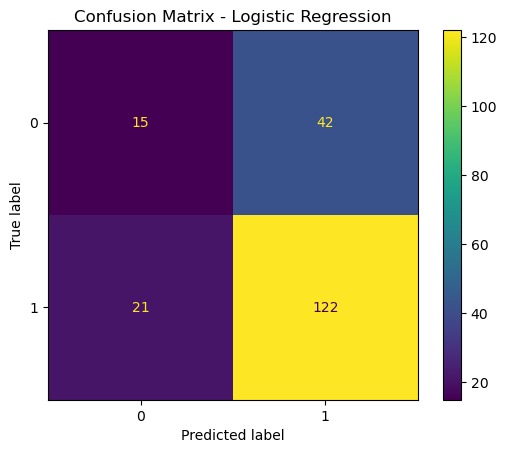

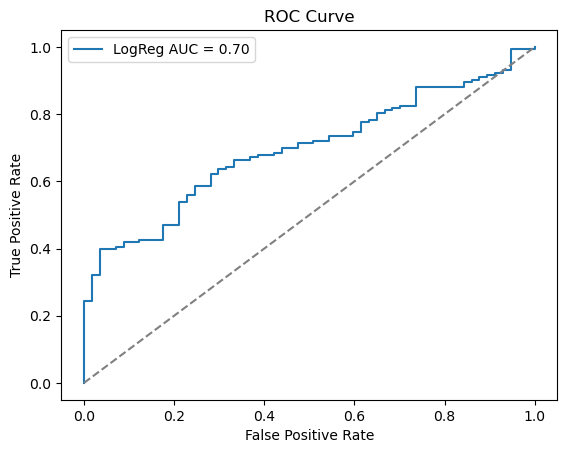

In [4]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Best model from GridSearch
best_model = grid_lr.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='LogReg AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Saving Best Model

In [5]:
import joblib
joblib.dump(best_model, '../models/logistic_model_tuned.pkl')

['../models/logistic_model_tuned.pkl']